#                                          Credit EDA Case Study
                                           
This case study aims to have an idea of applying EDA in a real business scenario. In this case study,we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

So, in simple terms, you're trying to use data to find out what makes someone a good or bad borrower, so the company can make better loan decisions and not reject people who can actually repay their loans.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
import warnings
import matplotlib.ticker as ticker


#### Step 1: Data Sourcing

In [2]:
#Reading the csv file for application data
customer_df=pd.read_csv(r'C:\Users\priyanka shah\Downloads\application_data.csv')

#Reading the csv file for previous application data
customer_prev_df=pd.read_csv(r'C:\Users\priyanka shah\Downloads\previous_application.csv')

###### Information about the application data

In [3]:
customer_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Checking no. of rows and columns of given data
customer_df.shape

(307511, 122)

In [5]:
customer_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
# Check the column-wise info of the dataframe
customer_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

###### Information about the previous application data

In [7]:
customer_prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
customer_prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [9]:
customer_prev_df.shape

(1670214, 37)

In [10]:
# Check the column-wise info of the dataframe
customer_prev_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

#### Step 2: Data Cleaning

###### Analysing the missing data in previous application data

In [11]:
#Checking for only columns having null values in application data
null_value=(customer_prev_df.isnull().sum()/len(customer_prev_df)*100)[customer_prev_df.isnull().mean()*100 > 0]
null_value


AMT_ANNUITY                  22.286665
AMT_CREDIT                    0.000060
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [12]:
#Empty columns in the previous data
empty_cols= null_value[null_value>(0.3*len(null_value))]
len(empty_cols)


14

In [13]:

empty_cols = list(empty_cols[empty_cols.values>=0.3].index)
customer_prev_df.drop(labels=empty_cols,axis=1,inplace=True)

customer_prev_df.shape


(1670214, 23)

In [14]:

customer_prev_df=customer_prev_df.drop(customer_prev_df[customer_prev_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
customer_prev_df=customer_prev_df.drop(customer_prev_df[customer_prev_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
customer_prev_df=customer_prev_df.drop(customer_prev_df[customer_prev_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

customer_prev_df.shape


(69635, 23)

###### Analysing the missing data in application data

In [15]:
#Checking all columns to find which columns have null values in application data
null_value=(customer_df.isnull().sum()/len(customer_df)*100)
null_value

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [16]:
#Checking for only columns having null values in application data
null_value=(customer_df.isnull().sum()/len(customer_df)*100)[customer_df.isnull().mean()*100 > 0]
null_value


AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50

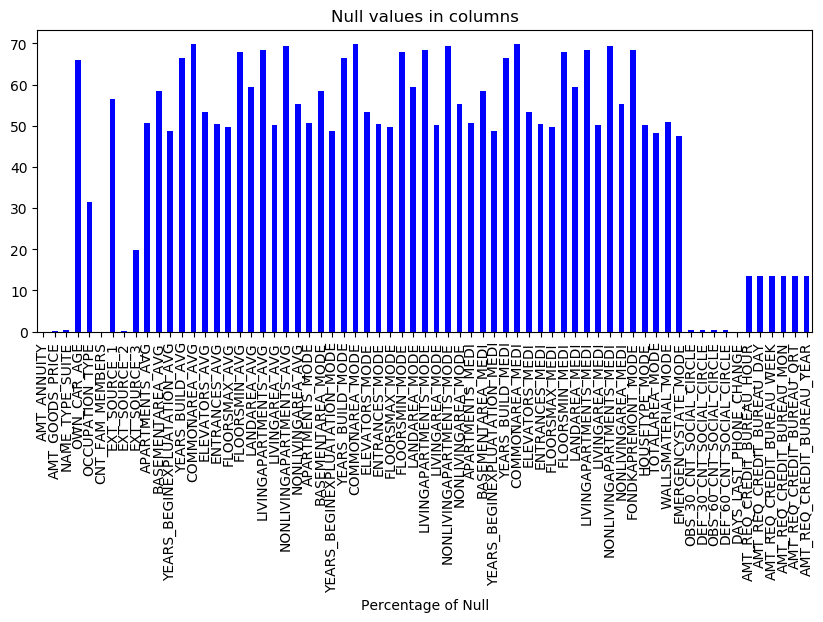

In [17]:
#Plotting graph for only columns having null values in application data
plt.figure(figsize = (10,4), dpi=100)
null_value.plot(kind = "bar",color="blue")
plt.title("Null values in columns")
plt.xlabel('Percentage of Null')
plt.show()


###### Handling missing data in application data

In [18]:
def null_percentage(customer_df):
    output = round(customer_df.isnull().sum()/len(customer_df.index)*100,2)
    return output


In [19]:
# Columns with more than 50% missing values for the application data
Na_col = null_percentage(customer_df)
Na_col = Na_col[Na_col>0]
Na_col_more_50 = Na_col[Na_col>50]
print("Number of columns with null value > 50% :", len(Na_col_more_50.index))
print(Na_col_more_50)

Number of columns with null value > 50% : 41
OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEA

In [20]:
#Dropping the columnns with more than 50% missing values for application data (we can drop columns which has more than 50% of missing values as it won't make a difference)
customer_df = customer_df.drop(columns=Na_col_more_50.index)
customer_df.shape

(307511, 81)

In [21]:
# Removing some unnecessary columns for application data
customer_df = customer_df.drop(columns=['NAME_TYPE_SUITE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','REGION_RATING_CLIENT_W_CITY','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE'])
customer_df.shape

(307511, 36)

In [22]:
# Checking for the missing values less than 50 percent for application data
Na_col = null_percentage(customer_df)
Na_col = Na_col[Na_col>0]
Na_col_less_50 = Na_col[Na_col<50]
print("Number of columns with null value < 50% :", len(Na_col_less_50.index))
print(Na_col_less_50)

Number of columns with null value < 50% : 12
AMT_GOODS_PRICE                0.09
OCCUPATION_TYPE               31.35
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64


In [23]:
#Now handling all the columns with null values <50% in application data. There are total of 12 columns
#We will be imputing the missing values in all columns using " median" so as to preserve the overall distribution of the 
#data to some extent. This is important because it ensures that the imputed values are consistent with the existing data patterns.


In [24]:
#column 1
customer_df.AMT_GOODS_PRICE.describe()


count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [25]:
# imputing the missing value in the AMT_GOOD_PRICE column with median value 
customer_df['AMT_GOODS_PRICE'] = customer_df['AMT_GOODS_PRICE'].fillna( customer_df['AMT_GOODS_PRICE'].median())

#validating the missing value for column AMT_GOOD_PRICE after replacing with median value
customer_df.AMT_GOODS_PRICE.isnull().sum()


0

In [26]:
#column 2
customer_df.OBS_30_CNT_SOCIAL_CIRCLE.describe()


count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [27]:
#imputing the missing value in the OBS_30_CNT_SOCIAL_CIRCLE column with median value

customer_df['OBS_30_CNT_SOCIAL_CIRCLE'] = customer_df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(customer_df['OBS_30_CNT_SOCIAL_CIRCLE'].median())

#validating the missing value for column OBS_30_CNT_SOCIAL_CIRCLE after replacing with median value
customer_df.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()


0

In [28]:
#column 3
customer_df.DEF_30_CNT_SOCIAL_CIRCLE.describe()


count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [29]:
#imputing the missing value in the DEF_30_CNT_SOCIAL_CIRCLE column with median value
customer_df['DEF_30_CNT_SOCIAL_CIRCLE'] = customer_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(customer_df['DEF_30_CNT_SOCIAL_CIRCLE'].median())


In [30]:
#column 4 
customer_df.OBS_60_CNT_SOCIAL_CIRCLE.describe()


count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [31]:
#imputing the missing value in the OBS_60_CNT_SOCIAL_CIRCLE column with median value
customer_df['OBS_60_CNT_SOCIAL_CIRCLE'] =customer_df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(customer_df['OBS_60_CNT_SOCIAL_CIRCLE'].median())


In [32]:
#column 5
customer_df.DEF_60_CNT_SOCIAL_CIRCLE.describe()


count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [33]:
#imputing the missing value in the DEF_60_CNT_SOCIAL_CIRCLE column with median value

customer_df['DEF_60_CNT_SOCIAL_CIRCLE'] = customer_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(customer_df['DEF_60_CNT_SOCIAL_CIRCLE'].median())


In [34]:
#column 6
customer_df.AMT_REQ_CREDIT_BUREAU_HOUR.describe()


count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [35]:
# imputing the missing value in the AMT_REQ_CREDIT_BUREAU_HOUR column with median value

customer_df['AMT_REQ_CREDIT_BUREAU_HOUR'] = customer_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(customer_df['AMT_REQ_CREDIT_BUREAU_HOUR'].median())


In [36]:
#column 7
customer_df.AMT_REQ_CREDIT_BUREAU_DAY.describe()


count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [37]:
# imputing the missing value in the AMT_REQ_CREDIT_BUREAU_DAY column with median value

customer_df['AMT_REQ_CREDIT_BUREAU_DAY'] = customer_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna( customer_df['AMT_REQ_CREDIT_BUREAU_DAY'].median())


In [38]:
#column 8
customer_df.AMT_REQ_CREDIT_BUREAU_WEEK.describe()


count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [39]:
# imputing the missing value in the AMT_REQ_CREDIT_BUREAU_WEEK column with median value

customer_df['AMT_REQ_CREDIT_BUREAU_WEEK'] = customer_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna( customer_df['AMT_REQ_CREDIT_BUREAU_WEEK'].median())


In [40]:
#column 9
customer_df.AMT_REQ_CREDIT_BUREAU_MON.describe()


count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [41]:
# imputing the missing value in the AMT_REQ_CREDIT_BUREAU_MON column with median value

customer_df['AMT_REQ_CREDIT_BUREAU_MON'] = customer_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna( customer_df['AMT_REQ_CREDIT_BUREAU_MON'].median())


In [42]:
#column 10
customer_df.AMT_REQ_CREDIT_BUREAU_YEAR.describe()


count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [43]:
# imputing the missing value in the AMT_REQ_CREDIT_BUREAU_YEAR column with median value

customer_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = customer_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna( customer_df['AMT_REQ_CREDIT_BUREAU_YEAR'].median())


In [44]:
#column 11
customer_df.AMT_REQ_CREDIT_BUREAU_QRT.describe()


count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [45]:
# imputing the missing value in the AMT_REQ_CREDIT_BUREAU_QRT column with median value

customer_df['AMT_REQ_CREDIT_BUREAU_QRT'] = customer_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna( customer_df['AMT_REQ_CREDIT_BUREAU_QRT'].median())


In [46]:
#column 12
customer_df.OCCUPATION_TYPE.describe()


count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [47]:
# imputing the missing value in the OCCUPATION_TYPE column with Laborers.

customer_df['OCCUPATION_TYPE'] = customer_df['OCCUPATION_TYPE'].fillna('Laborers')


###### Standarizing the column values for application data


In [48]:
# Converting the negetive value columns to positive using abs() function

customer_df.DAYS_BIRTH = customer_df.DAYS_BIRTH.abs()                

customer_df.DAYS_EMPLOYED = customer_df.DAYS_EMPLOYED.abs()          

customer_df.DAYS_REGISTRATION = customer_df.DAYS_REGISTRATION.abs()  

customer_df.DAYS_ID_PUBLISH = customer_df.DAYS_ID_PUBLISH.abs()     

In [49]:
customer_df.CODE_GENDER.value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [50]:
#Since, Female is having the majority and only 4 rows are having NA values, 
#we can update those columns with Gender 'F' as there will be no impact on the dataset.

customer_df.loc[customer_df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
customer_df['CODE_GENDER'].value_counts()


F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [51]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

customer_df['AMT_INCOME_RANGE']=pd.cut(customer_df['AMT_INCOME_TOTAL'],bins,labels=slot)


In [52]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

customer_df['AMT_CREDIT_RANGE']=pd.cut(customer_df['AMT_CREDIT'],bins=bins,labels=slots)


In [53]:
# Value counts for ORGANIZATION_TYPE column

customer_df.ORGANIZATION_TYPE.value_counts()



Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [54]:
#Since there are huge number of 'XNA' values, so we can drop it
customer_df=customer_df.drop(customer_df.loc[customer_df['ORGANIZATION_TYPE']=='XNA'].index)
customer_df[customer_df['ORGANIZATION_TYPE']=='XNA'].shape


(0, 38)

###### Checking the outliers for application data

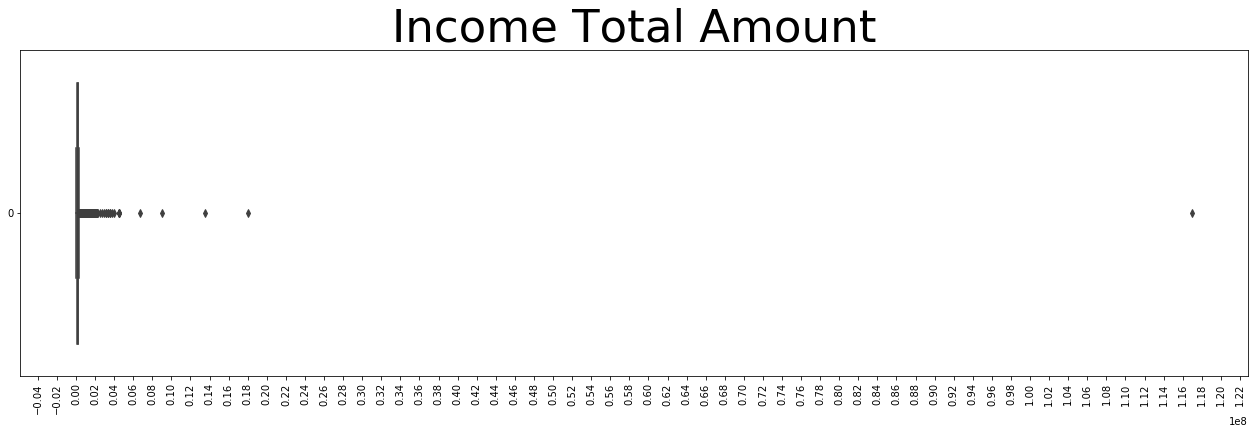

In [55]:
#1.Checking for Income Total Amount

fig = plt.figure(figsize=(22,6))
ax = sns.boxplot(data=customer_df.AMT_INCOME_TOTAL, orient='h')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000000))
ax.set_title('Income Total Amount',fontsize=45)
plt.xticks(rotation=90)
plt.show()


In [56]:
customer_df.AMT_INCOME_TOTAL.describe()


count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [57]:
#As income can vary from people to people. Therefore, no operation is required in this



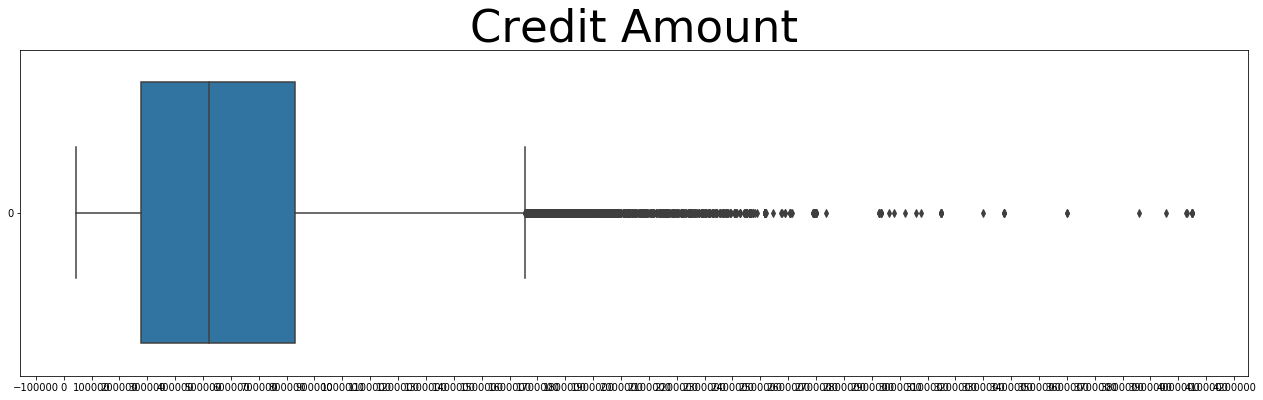

In [58]:
#2. Checking for Credit Amount

fig = plt.figure(figsize=(22,6))
ax = sns.boxplot(data=customer_df.AMT_CREDIT,orient='h')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticker.MultipleLocator(100000))
ax.set_title('Credit Amount',fontsize=45)
plt.show()


In [59]:
customer_df.AMT_CREDIT.describe()


count    2.521370e+05
mean     6.113985e+05
std      4.065272e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [60]:
#The outliers value can handled by converting into bins .

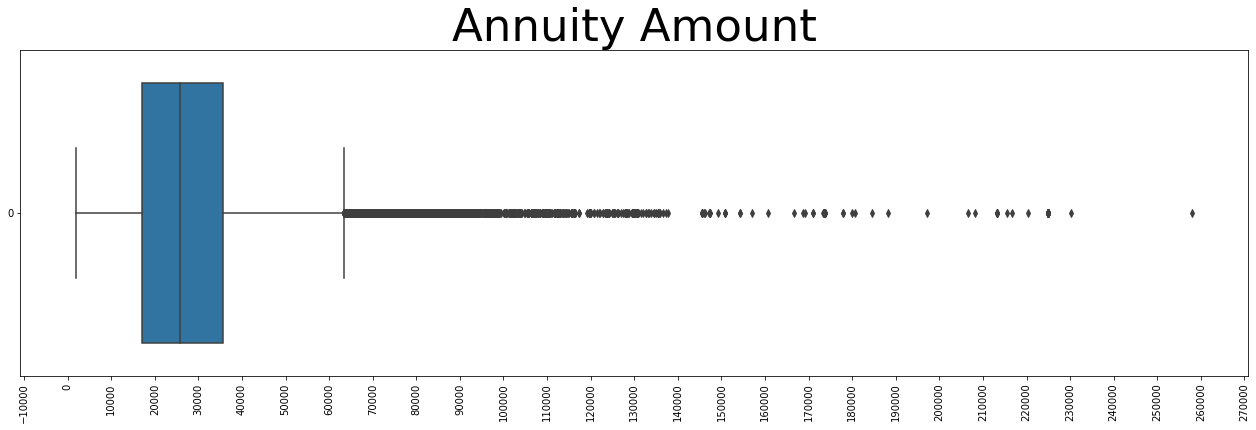

In [61]:
#3. Checking for Annuity Amount

fig = plt.figure(figsize=(22,6))
ax = sns.boxplot(data =customer_df.AMT_ANNUITY,orient='h')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000))
ax.set_title('Annuity Amount',fontsize=45)
plt.xticks(rotation=90)
plt.show()


In [62]:
customer_df.AMT_ANNUITY.describe()


count    252125.000000
mean      27812.325168
std       14647.759104
min        1980.000000
25%       17073.000000
50%       25834.500000
75%       35617.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [63]:
#Amount Annuity column has some outliers value and handled it by converting into bins.



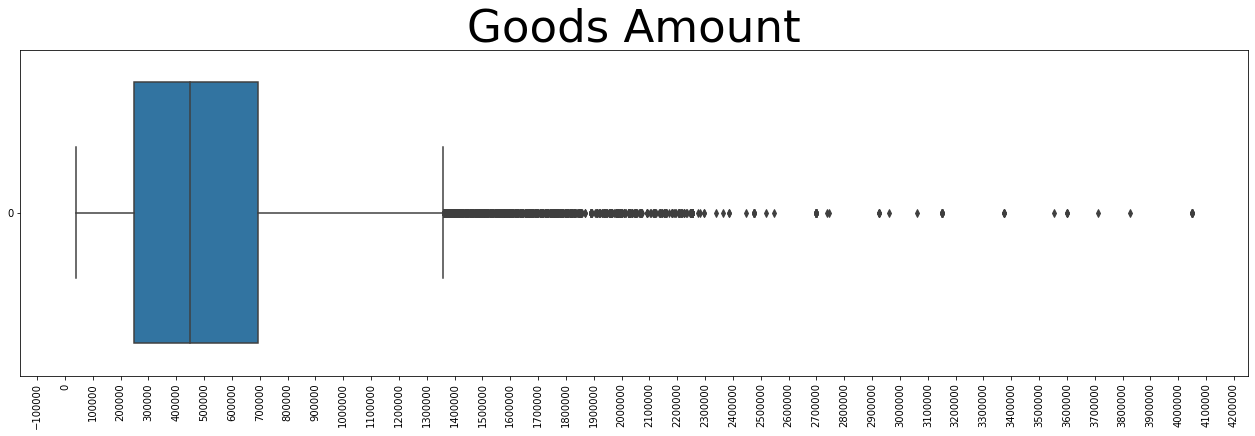

In [64]:
#4. Checking for Goods Amount

fig = plt.figure(figsize=(22,6))
ax = sns.boxplot(data=customer_df.AMT_GOODS_PRICE,orient='h')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticker.MultipleLocator(100000))
ax.set_title('Goods Amount',fontsize=45)
plt.xticks(rotation = 90)
plt.show()


In [65]:
customer_df.AMT_GOODS_PRICE.describe()


count    2.521370e+05
mean     5.493047e+05
std      3.730924e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      6.930000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [66]:
#No action should be taken on this column because prices can vary from product to product



###### Checking For Data Imbalance

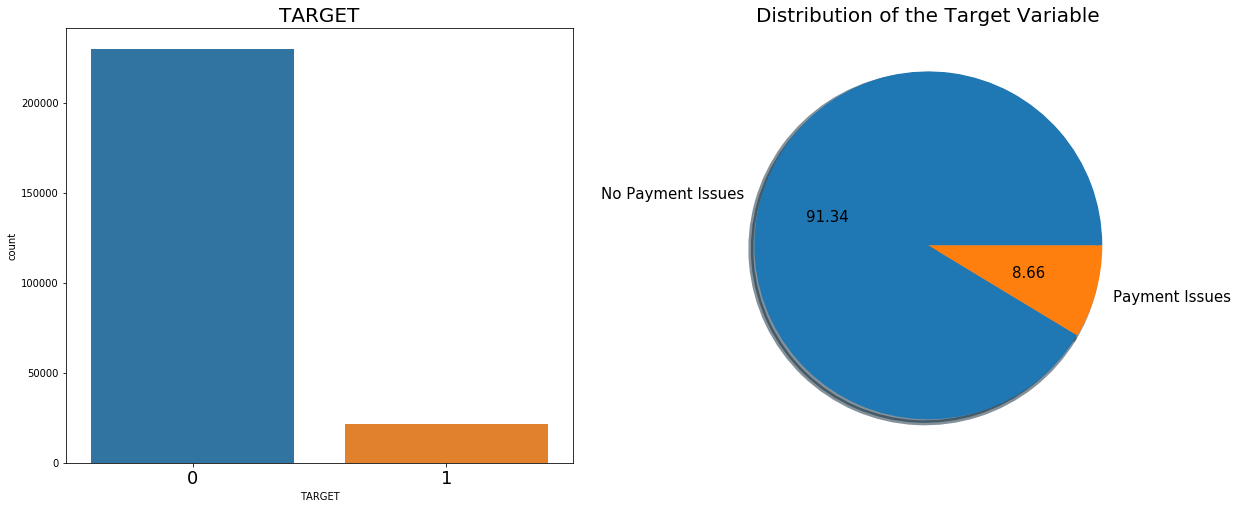

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize =(20,8))

ax = sns.countplot(customer_df.TARGET,ax=ax1)

ax1.set_title('TARGET',fontsize=20)

plt.setp(ax1.xaxis.get_majorticklabels(),fontsize=18)

ax2 = plt.pie(x=customer_df.TARGET.value_counts(normalize=True),autopct='%.2f',textprops={'fontsize':15},shadow=True,labels=['No Payment Issues','Payment Issues'],wedgeprops = {'linewidth': 5}) 

plt.title('Distribution of the Target Variable',fontsize=20)

plt.show()


In [68]:
print('Imbalance Percentage is : %.2f'%(customer_df.TARGET.value_counts(normalize=True)[0]/customer_df.TARGET.value_counts(normalize=True)[1]))


Imbalance Percentage is : 10.55


In [69]:
# We can divide the dataset to two into different dataframes i.e. target=0 (client with no payment difficulties) & target=1 (client with payment difficulties)

target0 = customer_df.loc[customer_df["TARGET"]==0]
target1 = customer_df.loc[customer_df["TARGET"]==1]


#### Step 3: Univariate Analysis

###### Unordered Categorical Univariate Analysis


In [70]:
def graph_uni(col):
    plt.figure(figsize=(17,6))
    plt.style.use('bmh')
    plt.subplot(1, 2, 1)
    sns.countplot(col, data=target0)
    plt.title('Distribution of '+ '%s' %col +' for target=0', fontsize=15)
    plt.xlabel(col , fontsize=15)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    
    plt.subplot(1, 2, 2)
    sns.countplot(col, data=target1)
    plt.title('Distribution of '+ '%s' %col +' for target=1', fontsize=14)
    plt.xlabel(col , fontsize=15)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()


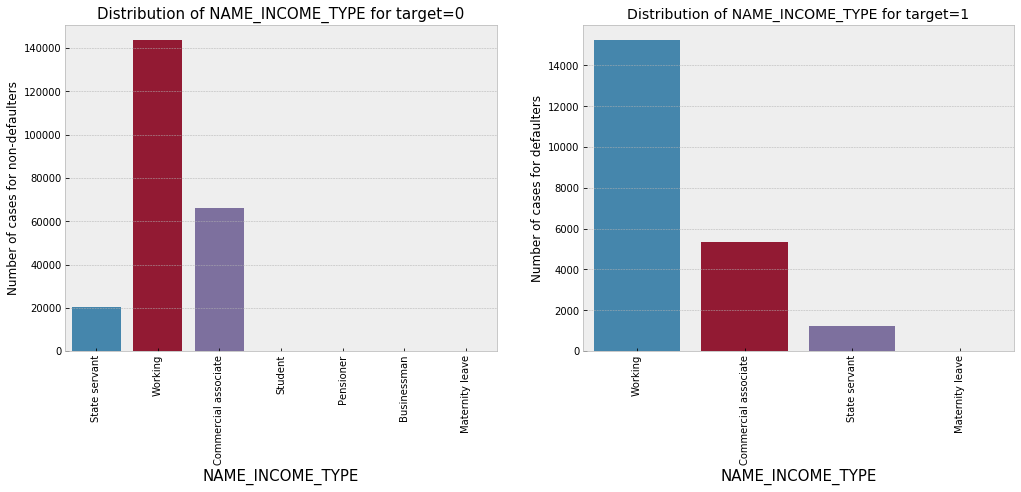

In [71]:
# 1.graph for NAME_INCOME_TYPE column

graph_uni('NAME_INCOME_TYPE')
plt.show()


In [72]:
#Working category has high number of defaulters



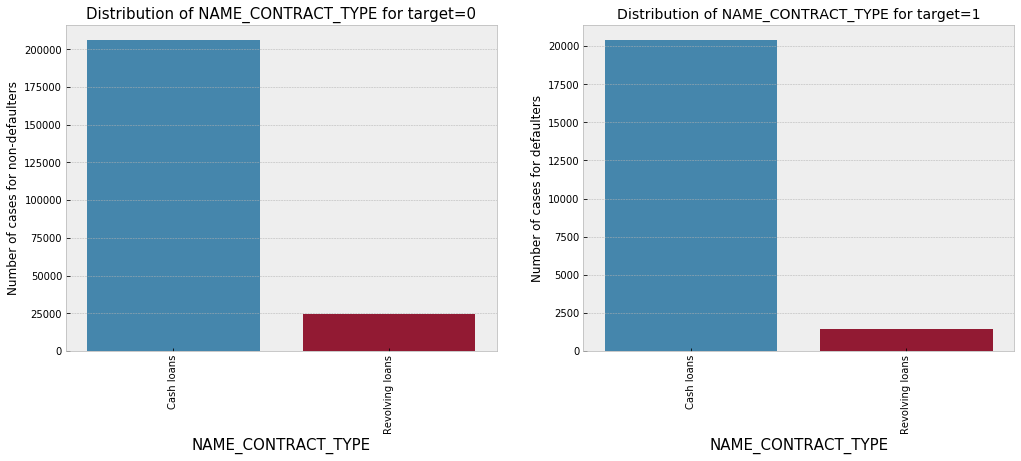

In [73]:
#2. graph for NAME_CONTRACT_TYPE column

graph_uni('NAME_CONTRACT_TYPE')


In [74]:
#Revolving loans has less distribution in number of cases for defaulters.



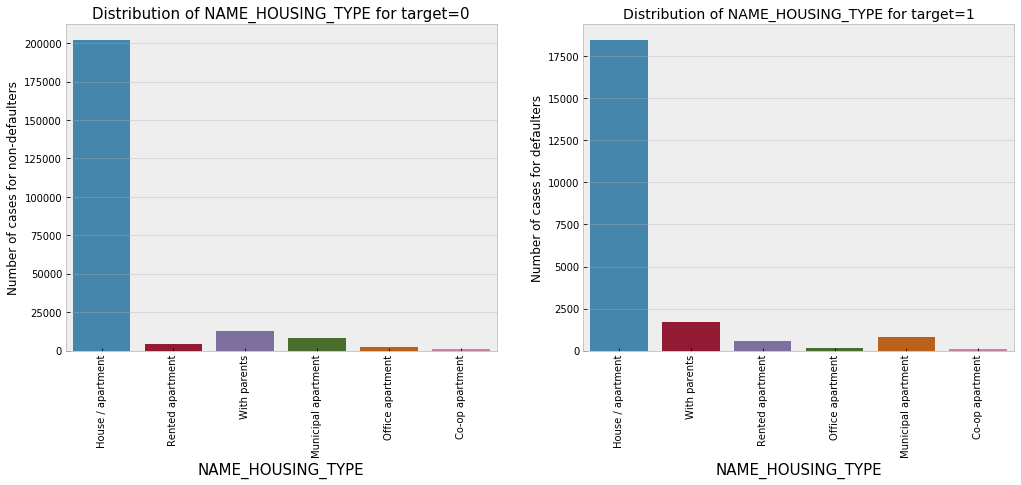

In [75]:
#3. graph for NAME_HOUSING_TYPE column

graph_uni('NAME_HOUSING_TYPE')


In [76]:
#People living with parents and in apartments show high number of defaulters. 



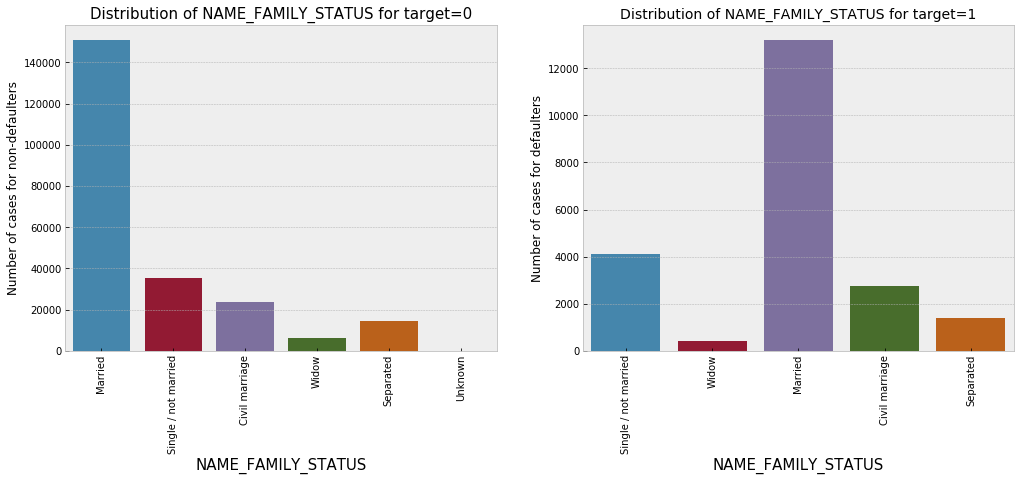

In [77]:
#4.graph for CODE_GENDER column

graph_uni('NAME_FAMILY_STATUS')


In [78]:
#Single ategory are showing high number of defaulters.



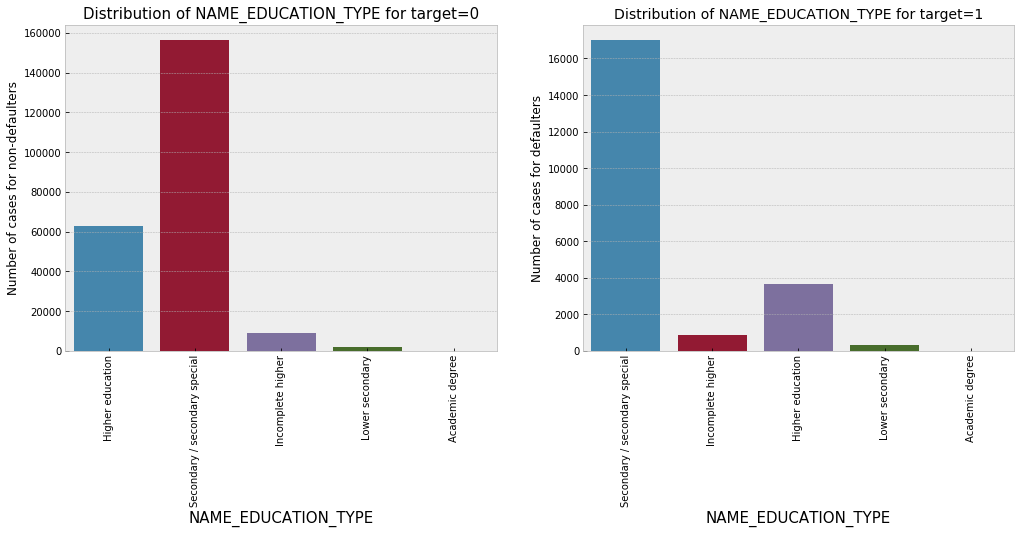

In [79]:
#5. graph for NAME_EDUCATION_TYPE column

graph_uni('NAME_EDUCATION_TYPE')


In [80]:
#Higher education is more in non defaulters as compared to in defaulters category. 

###### Numerical Categorical Univariate Analysis

In [81]:
def graph(customer_data, col, title, hue =None):
    
    sns.set_style("darkgrid")
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(customer_data[col].unique()) + 6.5 + 5*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    
    ax = sns.countplot(data = customer_data, x= col, order=customer_data[col].value_counts().index, hue = hue, palette='pastel') 
    plt.show()


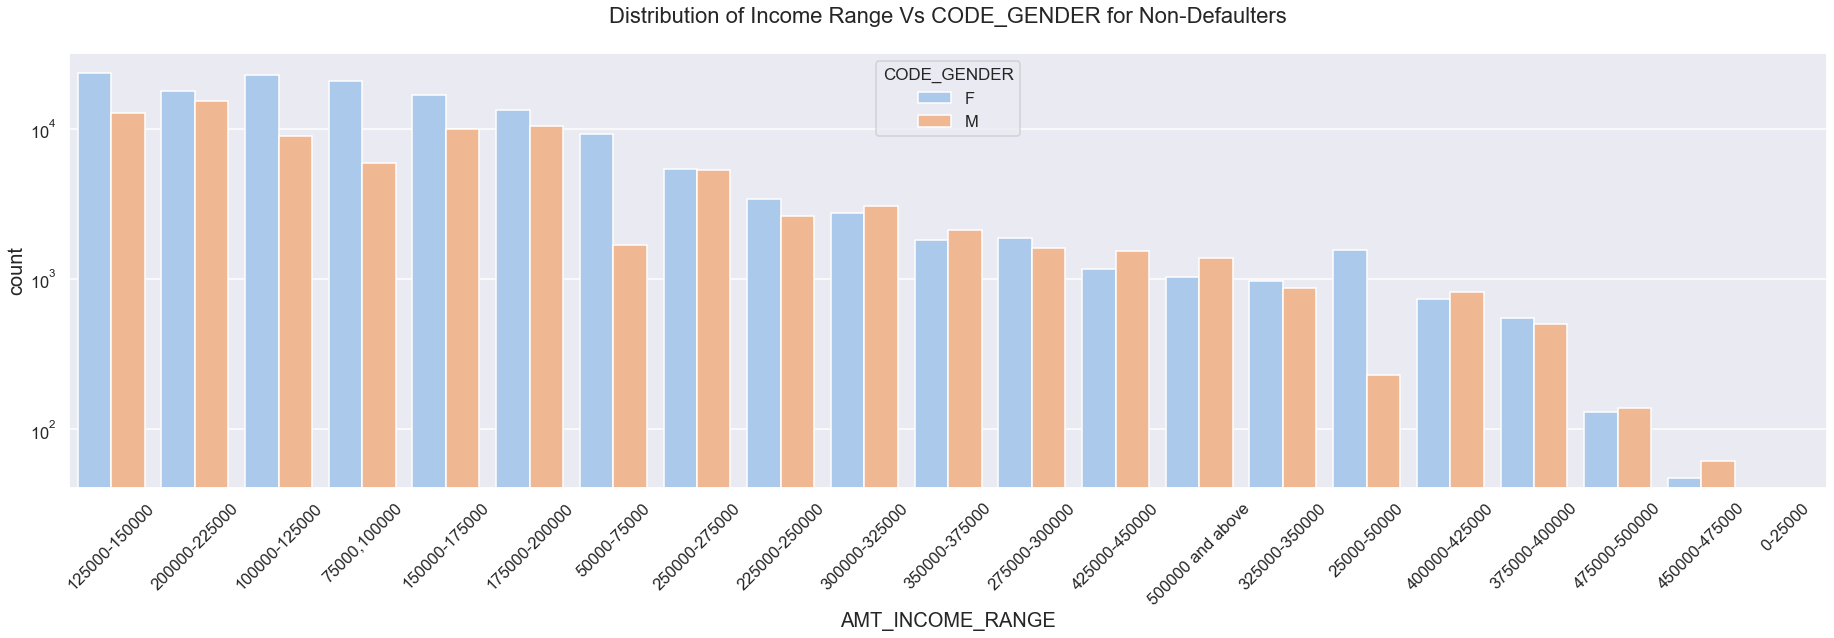

In [82]:
#1. Graph for Income Range Type Vs Gender for target = 0

graph(target0 ,col='AMT_INCOME_RANGE',title='Distribution of Income Range Vs CODE_GENDER for Non-Defaulters', hue='CODE_GENDER')


In [83]:
#Female numbers are mostly high in every proportion and also female credit are mostly higher than males(Loan Repayers)



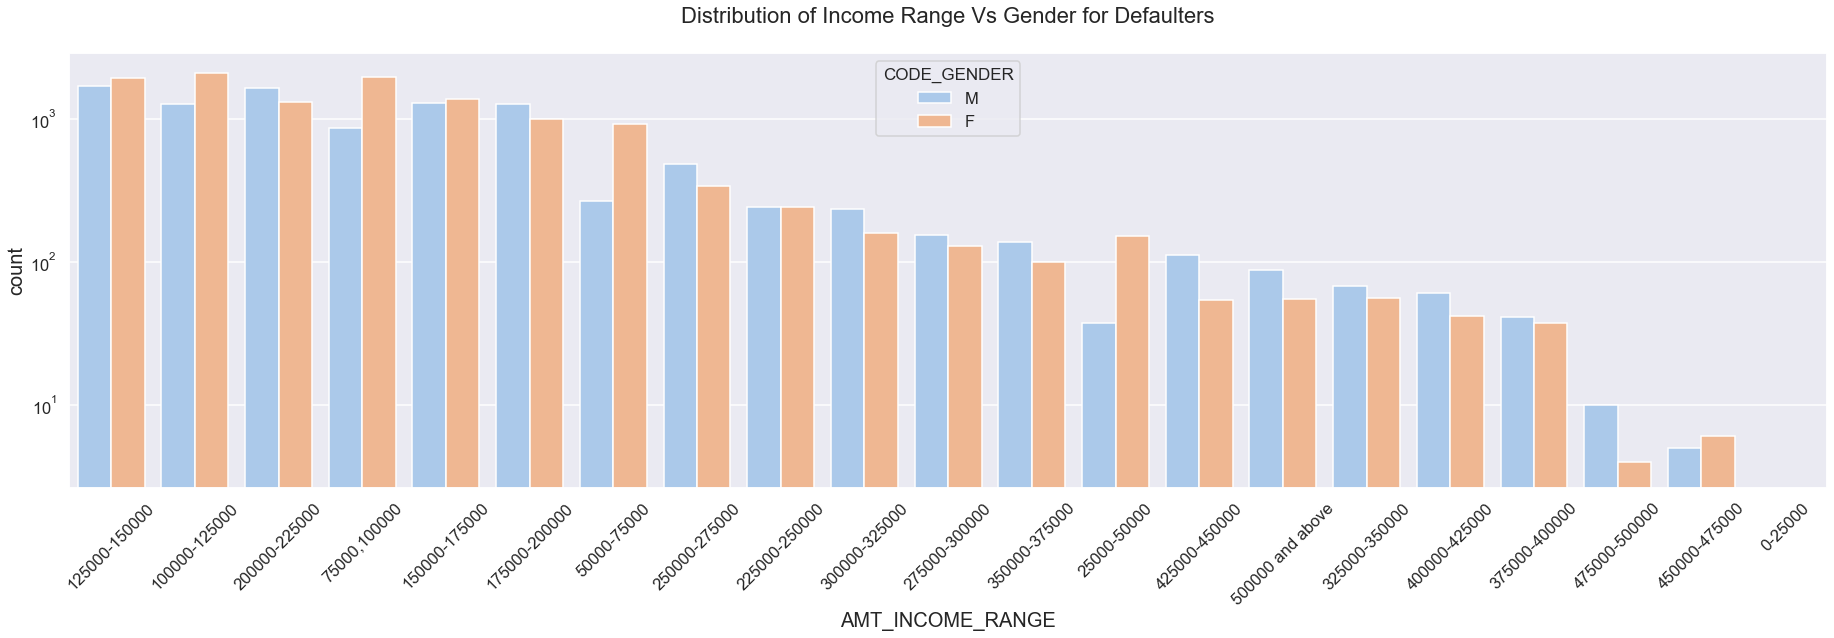

In [84]:
#2. Graph for Income Range Type Vs Gender for target = 1

graph(target1 ,col='AMT_INCOME_RANGE',title='Distribution of Income Range Vs Gender for Defaulters', hue='CODE_GENDER')


In [85]:
#Male numbers are mostly high in every proportion and also Male credit are mostly higher than Females(Loan Defaults)



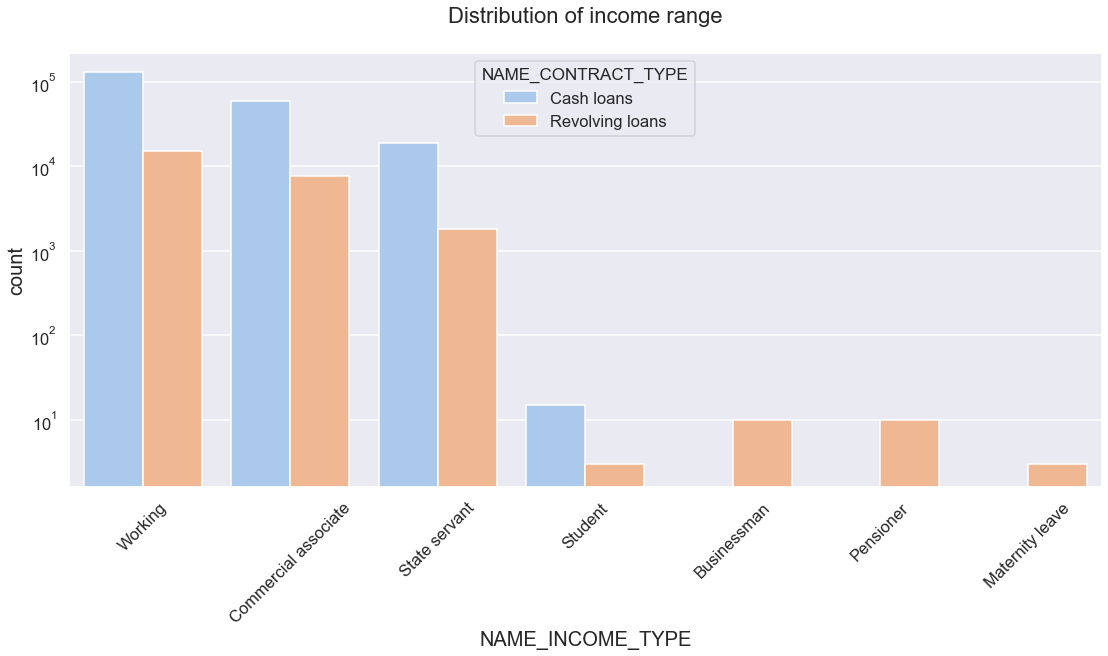

In [86]:
#3. Graph for Income Type Vs Contract type for target = 0

graph(target0 ,col='NAME_INCOME_TYPE',title='Distribution of income range', hue='NAME_CONTRACT_TYPE')


In [87]:
#Working class has more number of Cash Loans



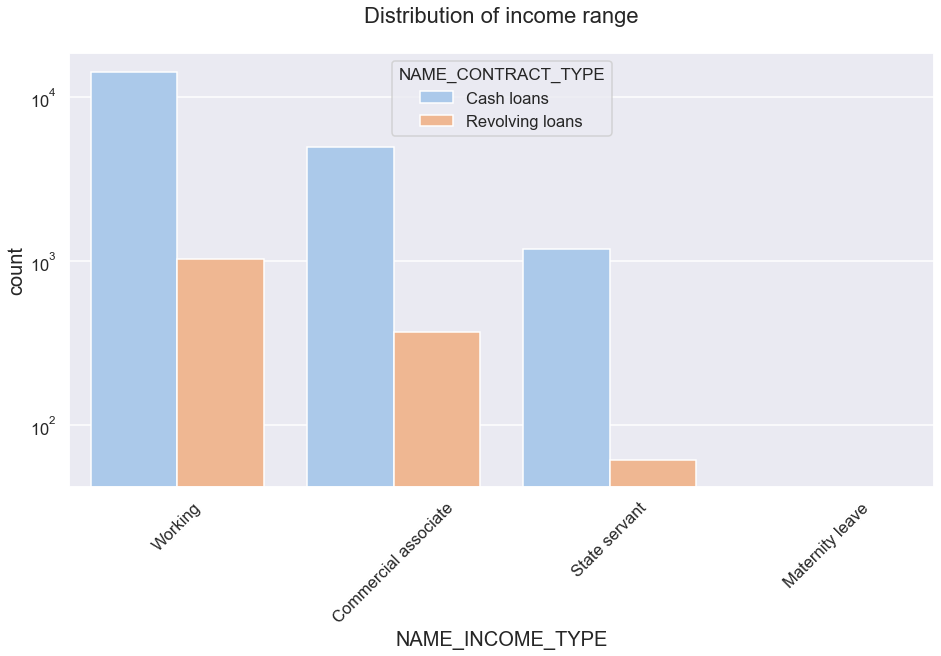

In [88]:
#4. Graph for Income Type Vs Contract type for target = 1

graph(target1 ,col='NAME_INCOME_TYPE',title='Distribution of income range', hue='NAME_CONTRACT_TYPE')


In [89]:
# Working class has more number of Cash Loans



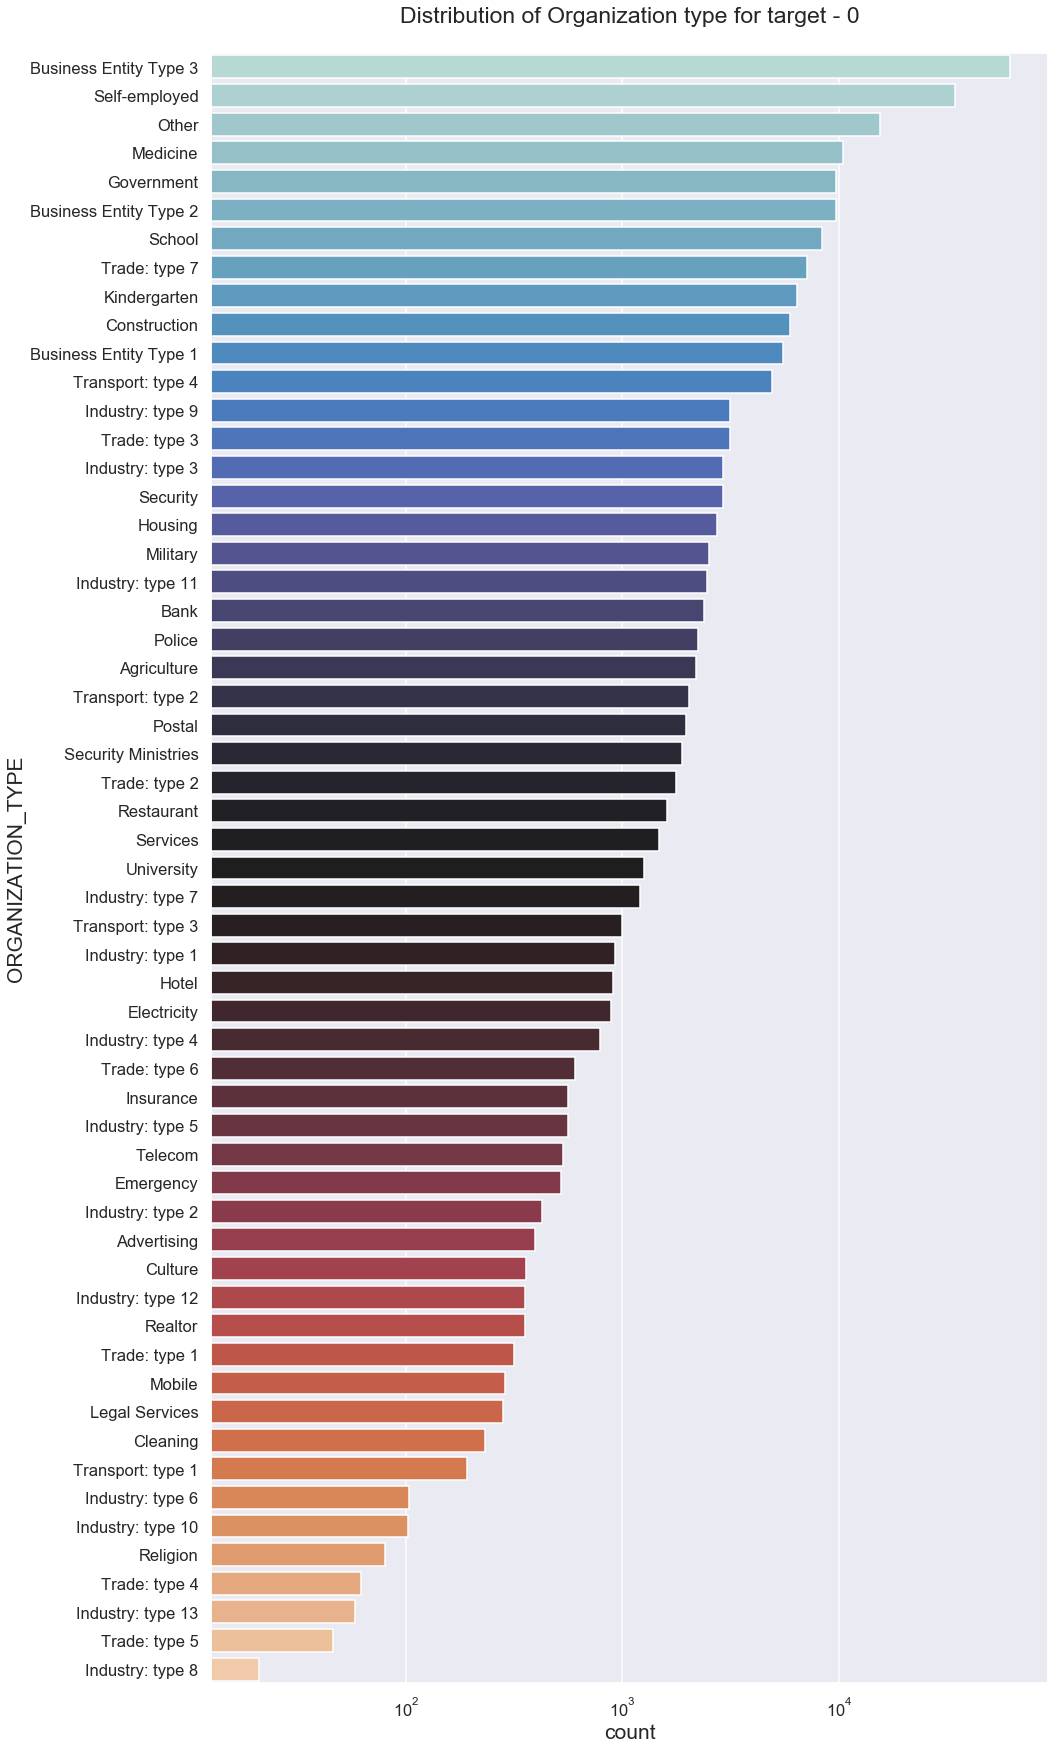

In [90]:
#5. Distribution of Organization Type for target = 0

plt.figure(figsize=(15,30))
sns.set_style('darkgrid')
plt.rcParams["axes.labelsize"] = 21
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')

plt.title("Distribution of Organization type for target - 0")

sns.countplot(data=target0 ,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index, palette="icefire")
plt.show()


In [91]:
#‘Business entity Type 3’ and ‘Self employed’ hold the most credits and less credit to industry trade: type5 and Industry: type 8(target = 0)



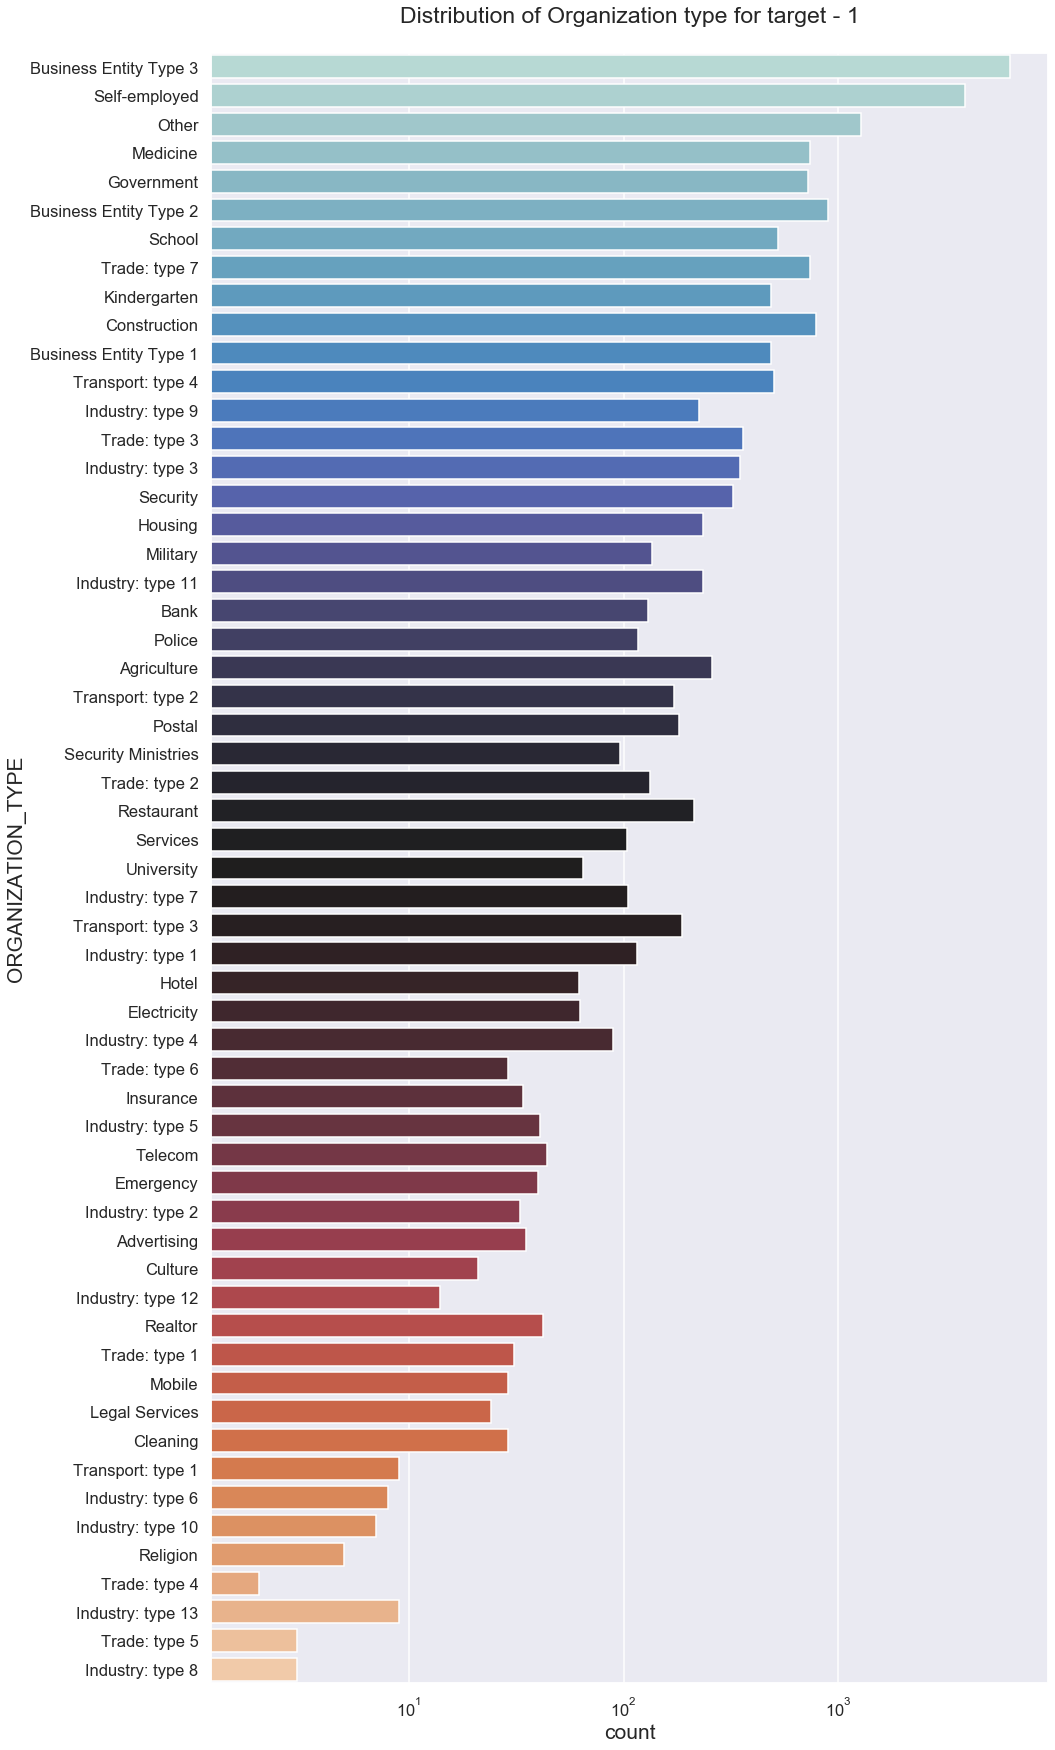

In [92]:
#6. Distribution of Organization Type for target = 1

plt.figure(figsize=(15,30))
sns.set_style('darkgrid')
plt.rcParams["axes.labelsize"] = 21
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')

plt.title("Distribution of Organization type for target - 1")

sns.countplot(data=target1 ,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index, palette="icefire")

plt.show()


In [93]:
#‘Business entity Type 3’ and ‘Self employed’ hold the most credits and less credit to industry trade: type5 and Industry: type 8 (target = 1)



#### Step 4: Bivariate Analysis

In [94]:
def graph_numeric (a,b):
    sns.set_style(style='ticks')
    fig=plt.figure(figsize=(16,7))
    
    sns.scatterplot(data = target0, y = b, x = a,  label='Loan Repayers',    color='steelblue')
    sns.scatterplot(data = target1, y = b, x = a,  label='Loan Defaulters',  color='hotpink')
    
    plt.title(f'{a} vs {b}',fontsize=21)
    plt.show()


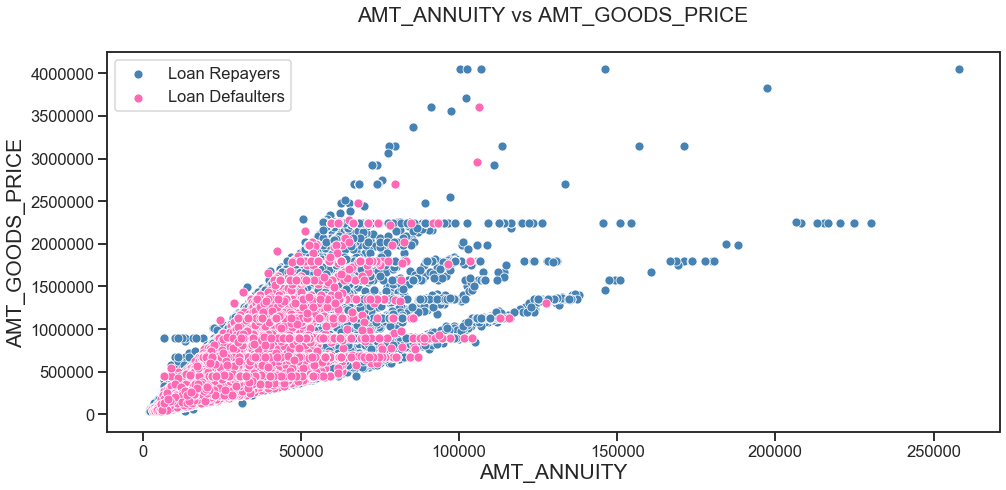

In [95]:
#1. graph for AMT_ANNUITY vs AMT_GOODS_PRICE

graph_numeric ('AMT_ANNUITY','AMT_GOODS_PRICE')


In [96]:
#Correlation between Amount Annuity & Amount Goods Price is pretty moderates but they are not thoroughly correlated

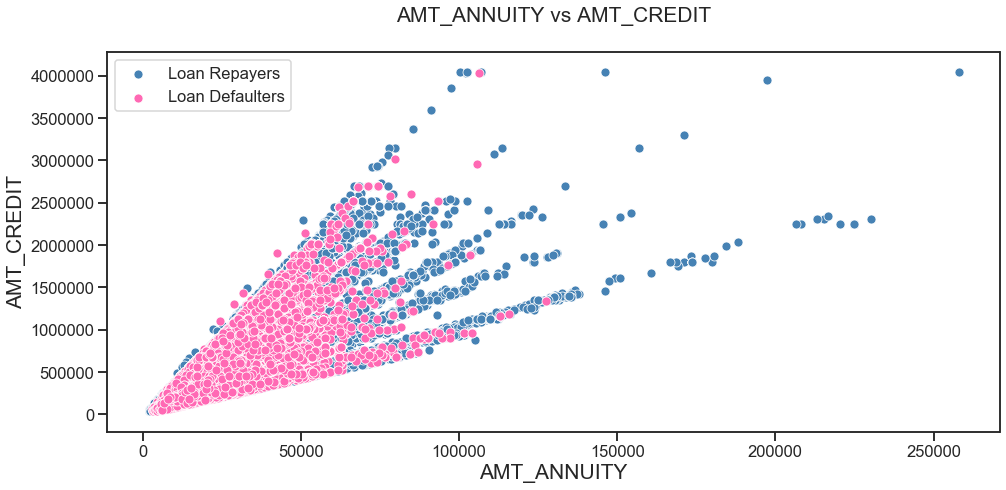

In [97]:
#2. graph for AMT_ANNUITY vs AMT_CREDIT

graph_numeric('AMT_ANNUITY','AMT_CREDIT')


In [98]:
#There's a decrease in defaulters when Amount Annuity increases. Most of the defaulters are having AMT_ANNUITY values less than 60000.



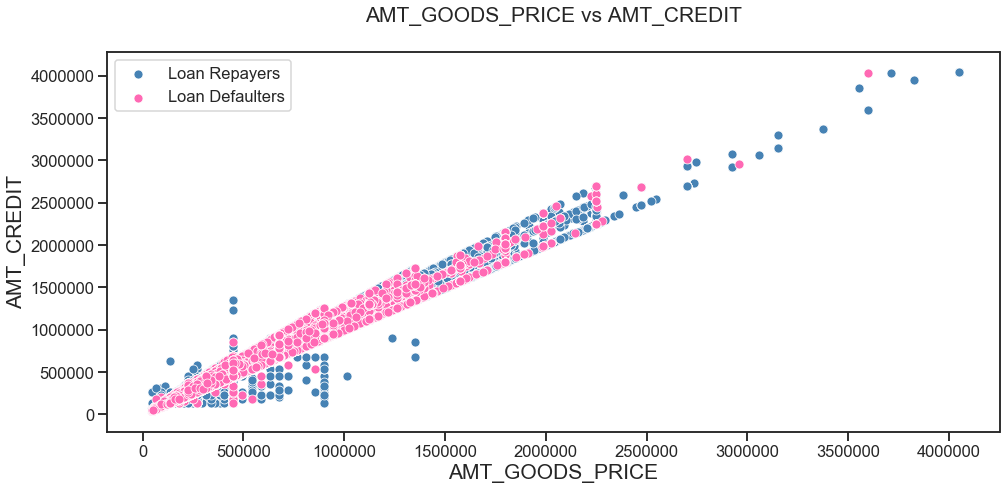

In [99]:
#3. graph for AMT_GOODS_PRICE vs AMT_CREDIT

graph_numeric('AMT_GOODS_PRICE','AMT_CREDIT')


In [100]:
# Amount Good Price & Amount Credit have a strong correlation as clients having goods price and will repay their loans.

#### Step 5: Correlation

In [101]:

cols_drop = ['SK_ID_CURR','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
target0 = target0.drop(columns=cols_drop)


In [102]:

corr_t0 = target0.corr().abs().round(3)
corr_t0


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.000,0.010,0.019,0.008,0.022,0.030,0.242,0.063,0.163,0.118,0.893,0.037,0.033
AMT_INCOME_TOTAL,NaN,0.010,1.000,0.326,0.401,0.333,0.169,0.046,0.030,0.035,0.026,0.003,0.184,0.056
AMT_CREDIT,NaN,0.019,0.326,1.000,0.762,0.986,0.104,0.153,0.088,0.015,0.035,0.037,0.107,0.040
AMT_ANNUITY,NaN,0.008,0.401,0.762,1.000,0.767,0.122,0.092,0.052,0.010,0.026,0.041,0.132,0.034
AMT_GOODS_PRICE,NaN,0.022,0.333,0.986,0.767,1.000,0.107,0.147,0.089,0.012,0.037,0.035,0.108,0.050
REGION_POPULATION_RELATIVE,NaN,0.030,0.169,0.104,0.122,0.107,1.000,0.041,0.009,0.060,0.004,0.029,0.543,0.175
DAYS_BIRTH,NaN,0.242,0.046,0.153,0.092,0.147,0.041,1.000,0.353,0.299,0.108,0.178,0.037,0.049
DAYS_EMPLOYED,NaN,0.063,0.030,0.088,0.052,0.089,0.009,0.353,1.000,0.172,0.087,0.032,0.017,0.022
DAYS_REGISTRATION,NaN,0.163,0.035,0.015,0.010,0.012,0.060,0.299,0.172,1.000,0.030,0.156,0.094,0.032


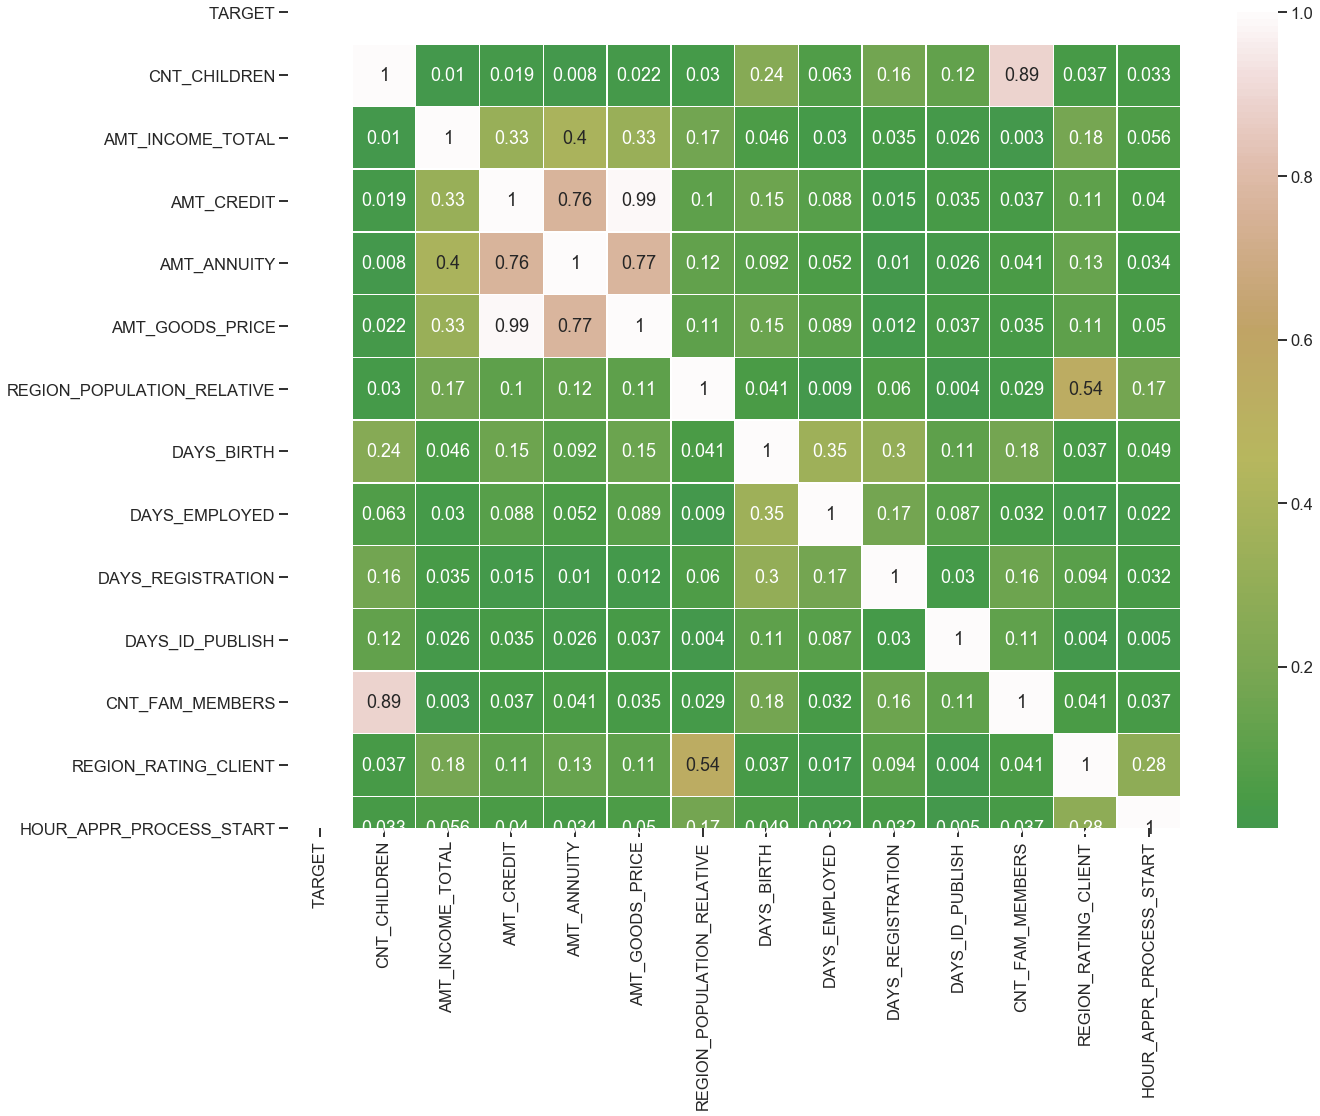

In [103]:
# Visualising the correlation data of target 0 using heatmaps

fig = plt.figure(figsize=(20,15))

sns.heatmap(data=corr_t0 ,linewidths=.5,center=0.1,cmap='gist_earth',annot= True)

plt.show()


In [104]:
# Finding top 10 correlation among the people with no payment issues and displaying it.

c = corr_t0 .abs()
s = c.unstack()

target_0_corr = s[s.index.get_level_values(0)!= s.index.get_level_values(1)].sort_values(ascending=False,kind='quicksort').drop_duplicates()

top_10_target0 = pd.DataFrame(target_0_corr)

top_10_target0 = top_10_target0.reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'}).dropna()

top_10_target0.head(10)


,Var1,Var2,Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.986
1,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893
2,AMT_ANNUITY,AMT_GOODS_PRICE,0.767
3,AMT_ANNUITY,AMT_CREDIT,0.762
4,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.543
5,AMT_INCOME_TOTAL,AMT_ANNUITY,0.401
6,DAYS_EMPLOYED,DAYS_BIRTH,0.353
7,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.333
8,AMT_CREDIT,AMT_INCOME_TOTAL,0.326
9,DAYS_REGISTRATION,DAYS_BIRTH,0.299


In [105]:
target1 = target1.drop(columns=cols_drop)


In [106]:

corr_t1 = target1.corr().abs().round(3)
corr_t1


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.000,0.002,0.002,0.016,0.008,0.032,0.177,0.033,0.126,0.090,0.894,0.047,0.039
AMT_INCOME_TOTAL,NaN,0.002,1.000,0.036,0.043,0.036,0.008,0.008,0.000,0.004,0.009,0.004,0.021,0.013
AMT_CREDIT,NaN,0.002,0.036,1.000,0.749,0.982,0.069,0.190,0.106,0.033,0.062,0.045,0.061,0.029
AMT_ANNUITY,NaN,0.016,0.043,0.749,1.000,0.749,0.074,0.090,0.049,0.014,0.044,0.055,0.076,0.023
AMT_GOODS_PRICE,NaN,0.008,0.036,0.982,0.749,1.000,0.076,0.185,0.112,0.032,0.065,0.042,0.069,0.042
REGION_POPULATION_RELATIVE,NaN,0.032,0.008,0.069,0.074,0.076,1.000,0.050,0.016,0.056,0.012,0.031,0.443,0.144
DAYS_BIRTH,NaN,0.177,0.008,0.190,0.090,0.185,0.050,1.000,0.307,0.241,0.136,0.110,0.049,0.035
DAYS_EMPLOYED,NaN,0.033,0.000,0.106,0.049,0.112,0.016,0.307,1.000,0.137,0.097,0.002,0.007,0.000
DAYS_REGISTRATION,NaN,0.126,0.004,0.033,0.014,0.032,0.056,0.241,0.137,1.000,0.050,0.124,0.112,0.048


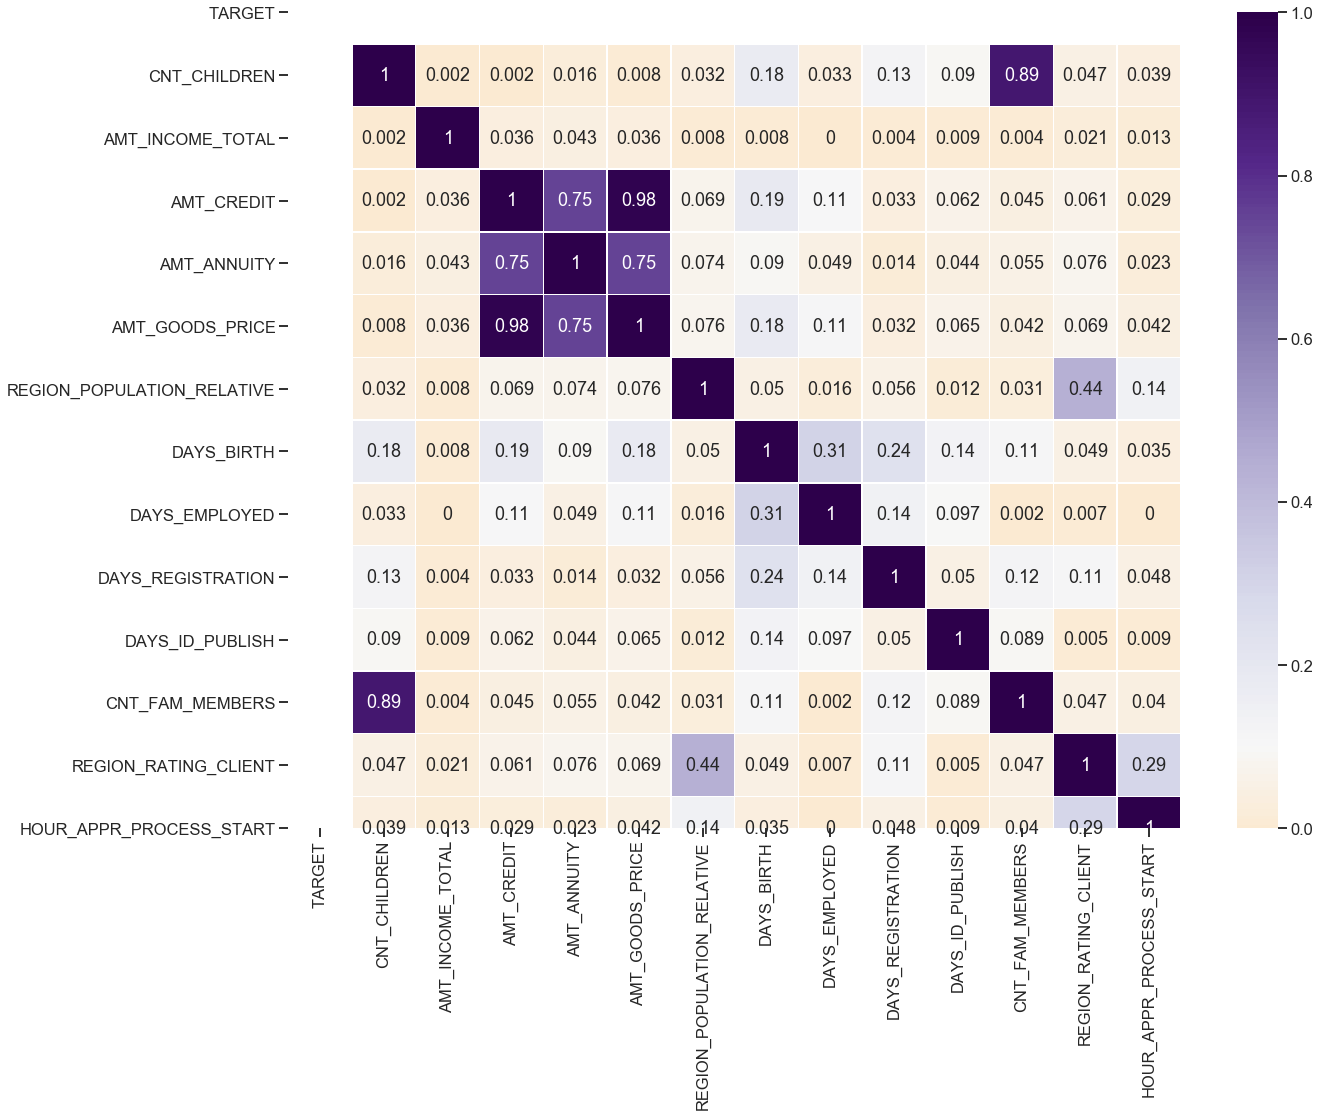

In [107]:
# PLotting the heatmap for displaying the correlation for target 1

fig = plt.figure(figsize=(20,15))

sns.heatmap(data=corr_t1,annot=True,cmap='PuOr',linewidths=0.5,center=0.1)

plt.show()


In [108]:
c1 = corr_t1

s1 = c1.unstack()


In [109]:
# Displaying Top 10 Correlations from target_1 : Loan Defaulter data frame

target_1_corr = s1[s1.index.get_level_values(0)!= s1.index.get_level_values(1)].sort_values(ascending=False,kind='quicksort').drop_duplicates()

top_10_target1  = pd.DataFrame(target_1_corr)

top_10_target1 = top_10_target1.reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'}).dropna()

top_10_target1.head(10)


,Var1,Var2,Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.982
1,CNT_CHILDREN,CNT_FAM_MEMBERS,0.894
2,AMT_ANNUITY,AMT_GOODS_PRICE,0.749
3,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,0.443
4,DAYS_BIRTH,DAYS_EMPLOYED,0.307
5,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT,0.290
6,DAYS_REGISTRATION,DAYS_BIRTH,0.241
7,AMT_CREDIT,DAYS_BIRTH,0.190
8,AMT_GOODS_PRICE,DAYS_BIRTH,0.185
9,DAYS_BIRTH,CNT_CHILDREN,0.177


#### Step 6: Merging the datasets (application_data and prev_application)

In [110]:
merge_df = pd.merge(left=customer_df,right=customer_prev_df,how='inner',on='SK_ID_CURR',suffixes='_x')


In [111]:
rename_merge_df = merge_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


In [112]:
rename_merge_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace=True)


###### Analysing the merged datasets

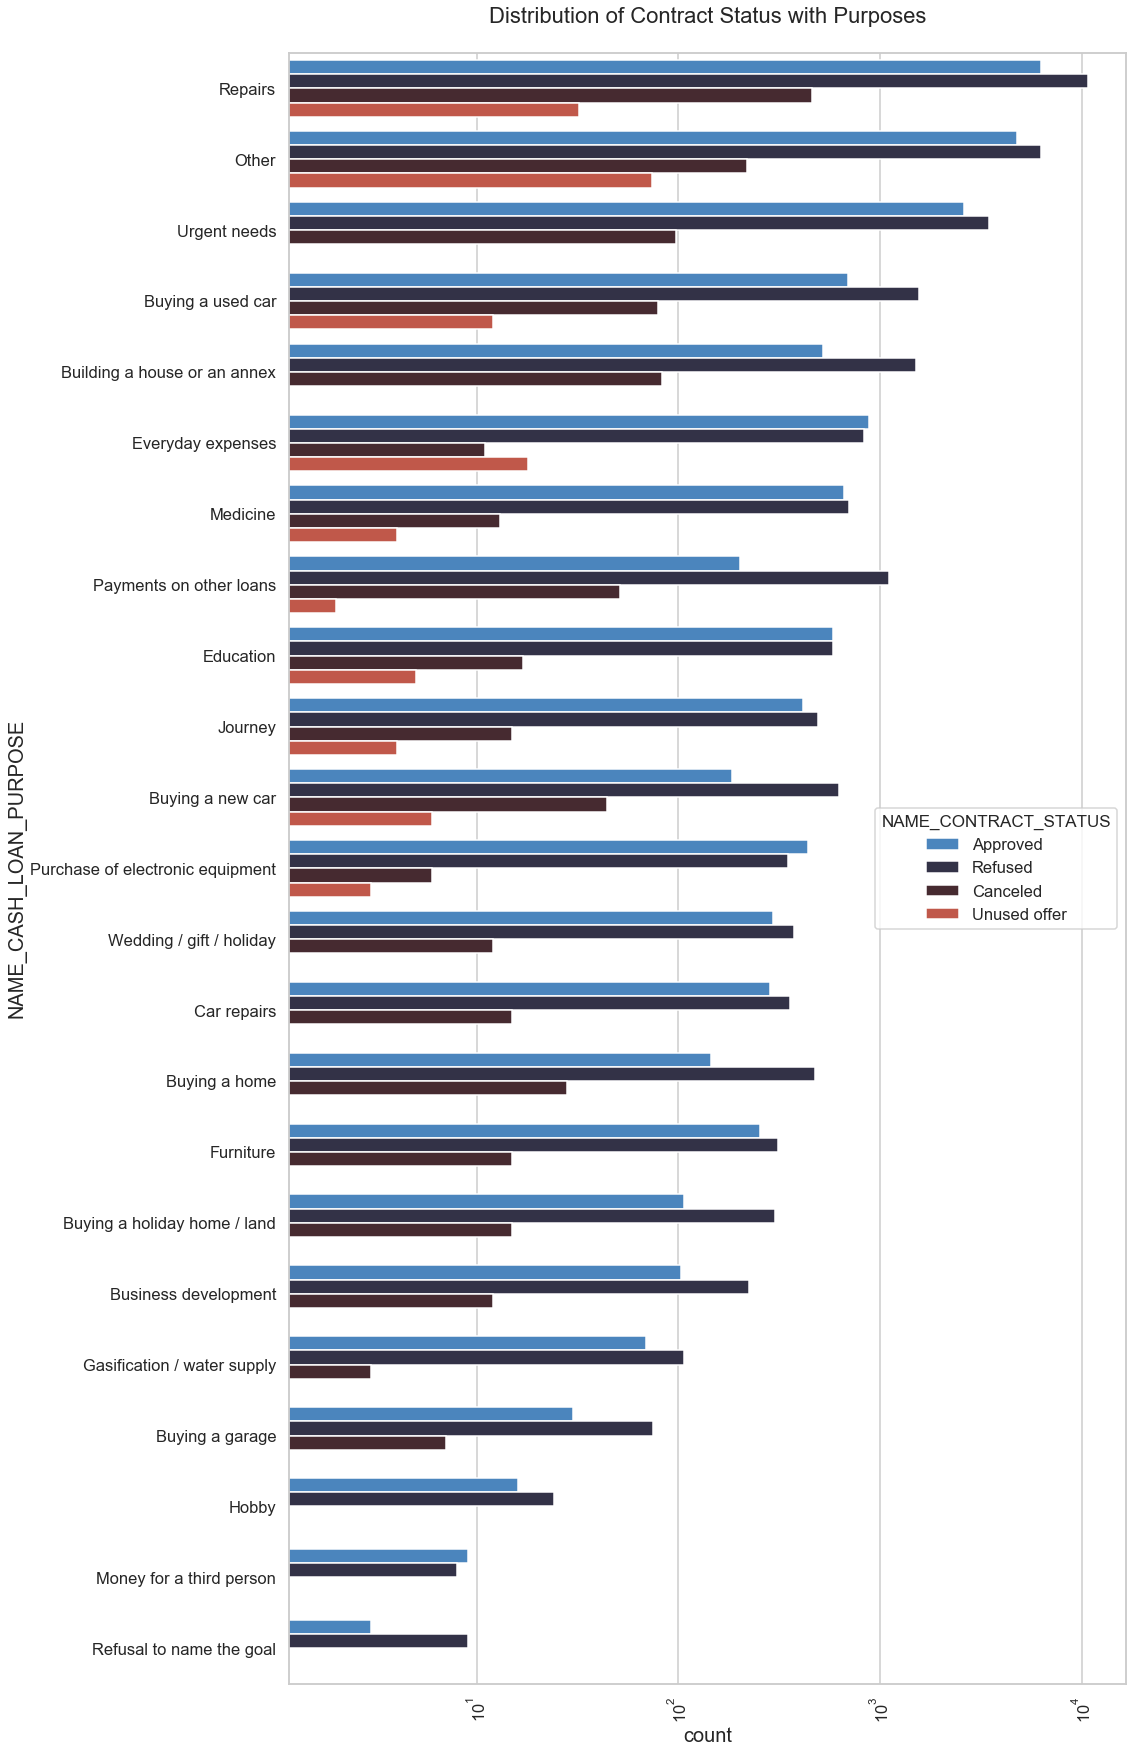

In [113]:
# 1. Graph of Cash Loans Vs Contract Purpose

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Contract Status with Purposes')

ax = sns.countplot(data = rename_merge_df, y= 'NAME_CASH_LOAN_PURPOSE', order=rename_merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='icefire')


In [114]:
# Repairs got most refused loans Education has similar outcomes for approval and rejection of loans Paying other loans and buying a new car is having significant higher rejection than approves.



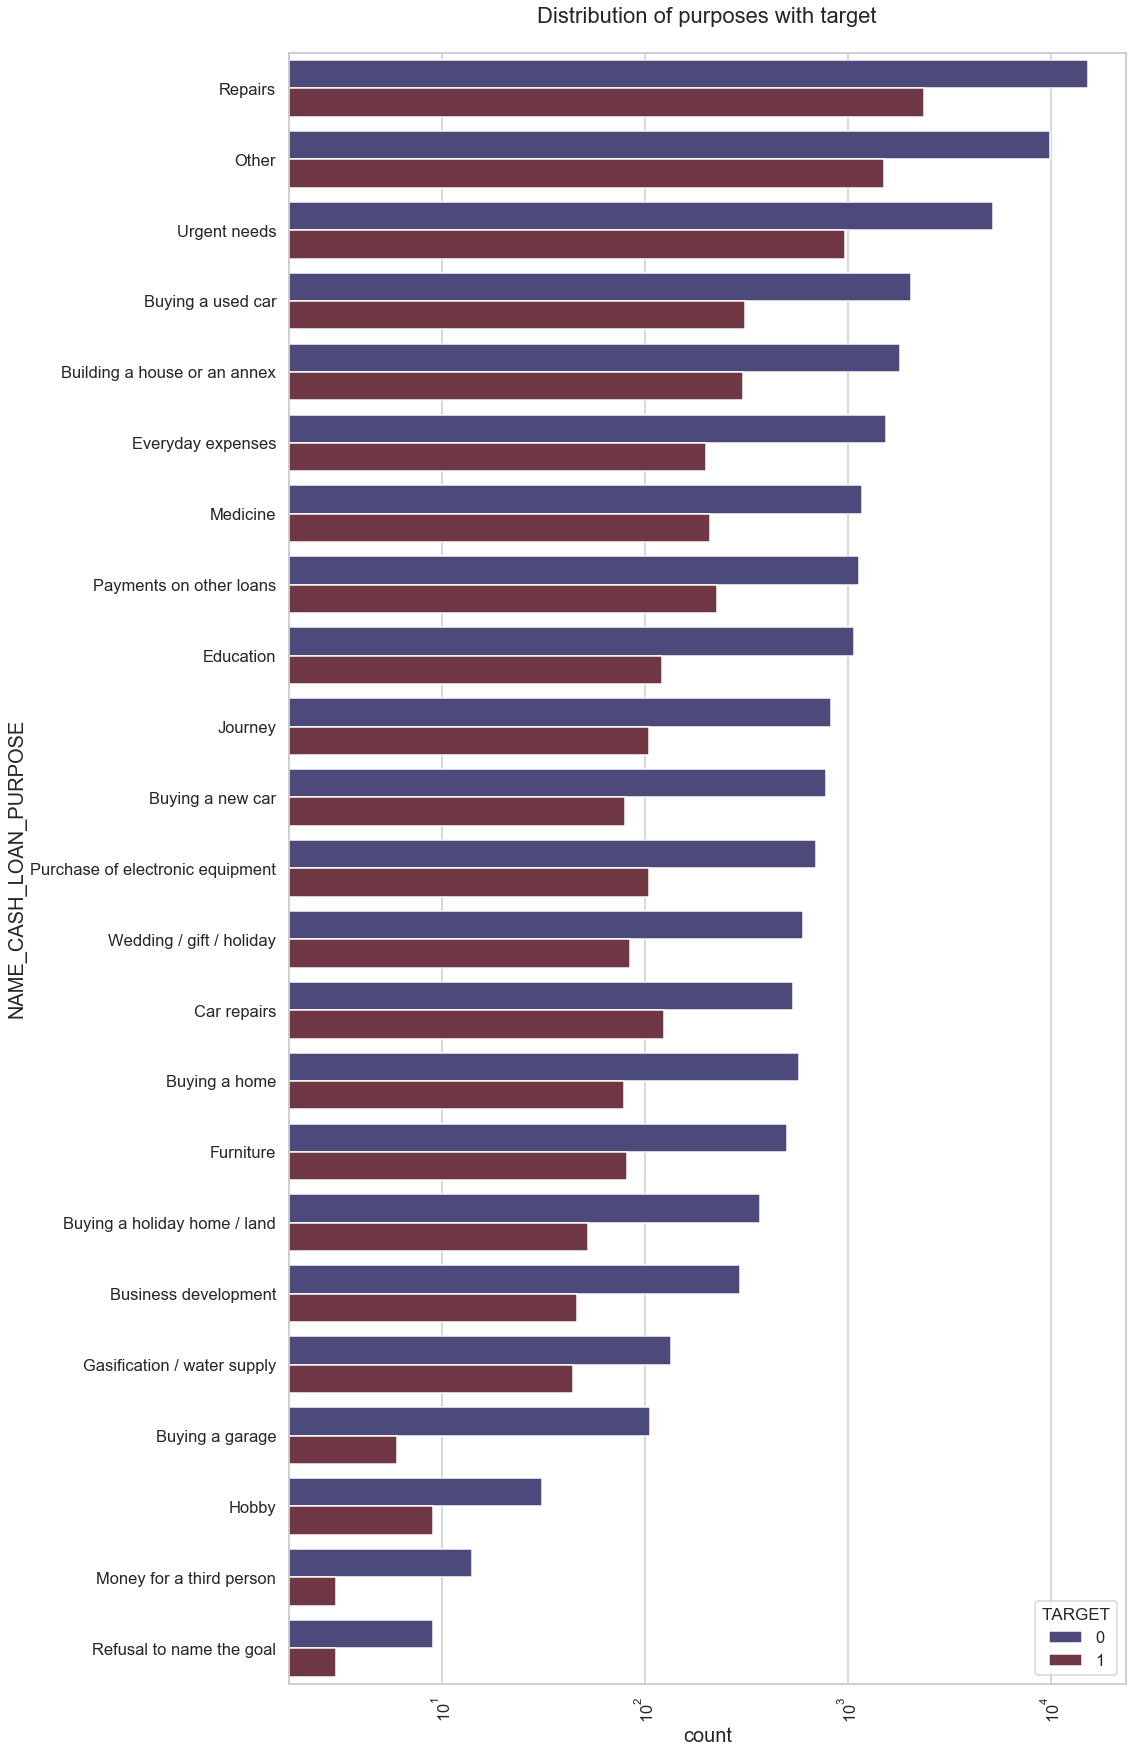

In [115]:
# Grpah of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target')

ax = sns.countplot(data = rename_merge_df, y= 'NAME_CASH_LOAN_PURPOSE', order=rename_merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue ='TARGET', palette='icefire')


In [116]:
# Repairs are dealing with more difficulties in payment on time Buying a garage, Business development, Buying land, Buying a new car and Education having basically higher loan payment



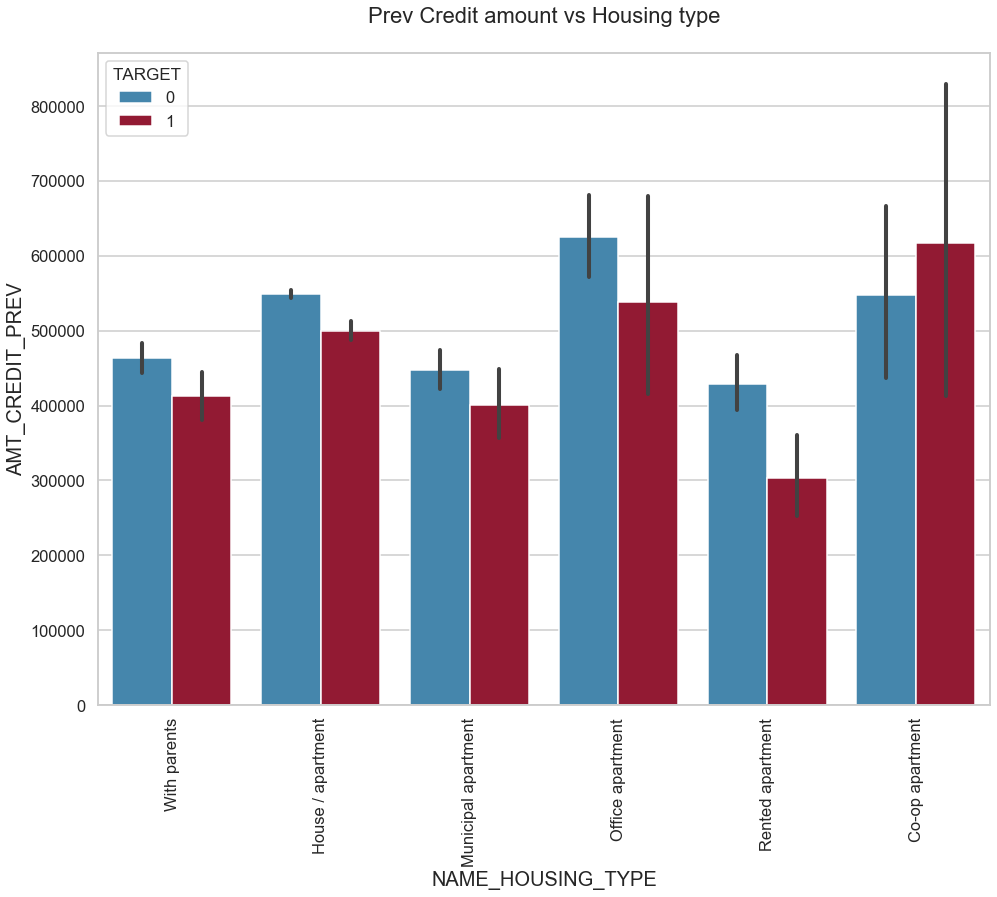

In [117]:
#3. Graph for Credit amount prev vs Housing type

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data = rename_merge_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()


In [118]:
# Office apartment is having higher credit of non-defaulters and co-op apartment is having higher credit of defaulters. Bank can focus mostly on housing type categories like ‘with parents’ or ‘house/apartment’ or municipal apartment for successful payments.



Conclusion

Final Conclusion for groups where loan can be provided:
1. Old people of any income group
2. Female clients with higher education
3. Any client who’s previous loan was approved
4. Clients with high income category
5. Giving loans to married is recommended
6. Business Entity Type 3 and self employed people
7. Clients from housing type ‘With parents’.


Final Conclusion for groups where loan should not be provided:
1. Loan purpose “Repair”
2. Income type “Working”
3. Previously refused loan status group
4. Unemployed Clients
5. Lower secondary and secondary educated clients
